# Day9. 기본과제

Req-1. basic.
ipynb 파일을 생 성 한 후 Hello World 를 출력해 보세요

In [1]:
print('Hello World')

Hello World


Req-2. basic.ipynb
파일에 일주일은 몇 초 인지 표시하는 코드를 자유롭게 Colab
에 추가 후 실행해 보세요.


In [2]:

print("일주일은",(7 * 24 * 60 * 60), "초")

일주일은 604800 초


Req-3. basic.ipynb
파일에 Colab 의 코드 스니펫 창의 다음의 코드들을 추가 후
실행해 보세요
- Visualization: Linked Brushing in Altair
- Camera Capture 를 추가해 본인의 얼굴을 찍어 보세요
- 추가로 1 개의 코드 스니펫을 자유롭게 선택 하여 올려 놓습니다
실행결과를
그대로 저장해 주세요

In [3]:
# Visualization: Linked Brushing in Altair

In [4]:
# Camera Capture 를 추가해 본인의 얼굴을 찍어 보세요


In [5]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


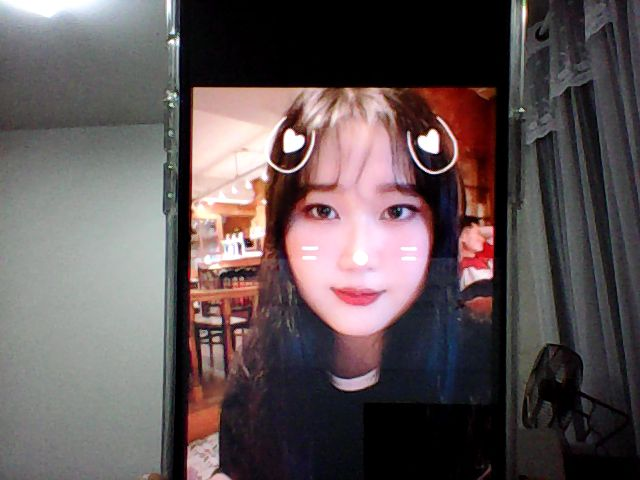

In [16]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# 추가로 1 개의 코드 스니펫을 자유롭게 선택 하여 올려 놓습니다 실행결과를 그대로 저장해 주세요


In [9]:
%%javascript
const listenerChannel = new BroadcastChannel('channel');
listenerChannel.onmessage = (msg) => {
  const div = document.createElement('div');
  div.textContent = msg.data;
  document.body.appendChild(div);
};

<IPython.core.display.Javascript object>

In [17]:
%%javascript
const senderChannel = new BroadcastChannel('channel');
senderChannel.postMessage('Hello world!');

<IPython.core.display.Javascript object>

Req-4. basic.ipynb
파일에 Google Drive 연동을 하는 코드를 추가하고 본인의 구글
드라이브 에 임의의 텍스트파일을 저장하는 코드를 작성해보세요 코드
스니펫 의 Mounting Google Drive in your VM 을 사용해도 무방합니다

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [12]:
ls

drive/  photo.jpg  sample_data/


In [18]:
from os import path
#dir = '/drive/My Drive/Colab'
with open(path.join("sample.txt"), "w") as f:
  f.write("Colab Sample.")

Req-5. 다음의 GPU가속 예제코드를 실행해 보고 CPU 사용시 처리시간과 GPU 사용시 처리시간을 비교해 보고 마지막 블럭인“Observe TensorFlow speedup on GPU relative to CPU“의 결과를 복사해서 basic.ipynb의 Req-5 다음에 텍스트 형태로 붙여 주세요.
☞ https://colab.research.google.com/notebooks/gpu.ipynb



Req.5의 실행결과는 다음과 같습니다.

```
Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.749689958999852
GPU (s):
0.18352883400007158
GPU speedup over CPU: 20x
```

Req-6. basic.ipynb
파일에 matplotlib 와 OpenCV 의 Drawing API 를 이용하여
화면에 여러 가지 도 형을 그려주는 코드를 작성해 보세요.

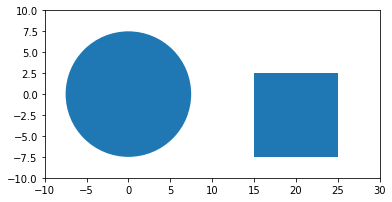

In [15]:
import matplotlib.pyplot as plt

circle_center = (0, 0)
circle_radius = 7.5
c = plt.Circle(circle_center,circle_radius)

r = plt.Rectangle((15,-7.5), 10, 10)


a = plt.axes(xlim=(-10,30), ylim=(-10, 10))
a.add_patch(c)
a.add_patch(r)
a.set_aspect('equal')

plt.show()